In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("DelayedFlights.csv")
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1936758, 29)

In [6]:
nanDf = df[df['AirTime'].isnull()]
nanDf.shape

(8387, 29)

In [7]:
nonNanDf = df.drop(df.index[list(nanDf.index)])

In [8]:
bins = 100*np.arange(26)
Depbins = np.digitize(nonNanDf.DepDelay,bins,right=False)
nonNanDf['depbins'] = Depbins

In [34]:
data = nonNanDf.groupby('depbins',group_keys=False).apply(lambda x:x.sample(min(len(x),40000)))
data.shape

(118889, 30)

In [35]:
data.depbins.value_counts()

1     40000
2     40000
3     28985
4      6631
5      1768
6       583
7       274
8       192
9       163
10      110
11       76
12       56
13       24
14       14
16        5
15        4
25        2
20        1
18        1
Name: depbins, dtype: int64

In [36]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,depbins
923280,2008,6,8,7,1724.0,1645,1857.0,1802,XE,3086,...,57.0,0,N,0,5.0,0.0,16.0,0.0,34.0,1
1088408,2008,7,8,2,2236.0,2145,2348.0,2310,WN,2004,...,7.0,0,N,0,1.0,0.0,0.0,0.0,37.0,1
433259,2008,3,20,4,1724.0,1655,1911.0,1840,OH,5560,...,16.0,0,N,0,29.0,0.0,2.0,0.0,0.0,1
208574,2008,2,21,4,1426.0,1420,1523.0,1525,WN,1056,...,6.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1
1778508,2008,12,16,2,910.0,900,1045.0,1043,XE,3018,...,16.0,0,N,0,NaN,NaN,NaN,NaN,NaN,1


In [37]:
del data['depbins']

In [38]:
data = data.append(nanDf)

In [39]:
data = data.reset_index(drop=True)
data.shape

(127276, 29)

In [40]:
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,8,7,1724.0,1645,1857.0,1802,XE,3086,...,4.0,57.0,0,N,0,5.0,0.0,16.0,0.0,34.0
1,2008,7,8,2,2236.0,2145,2348.0,2310,WN,2004,...,4.0,7.0,0,N,0,1.0,0.0,0.0,0.0,37.0
2,2008,3,20,4,1724.0,1655,1911.0,1840,OH,5560,...,10.0,16.0,0,N,0,29.0,0.0,2.0,0.0,0.0
3,2008,2,21,4,1426.0,1420,1523.0,1525,WN,1056,...,3.0,6.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,12,16,2,910.0,900,1045.0,1043,XE,3018,...,7.0,16.0,0,N,0,NaN,NaN,NaN,NaN,NaN


# Data Visualization

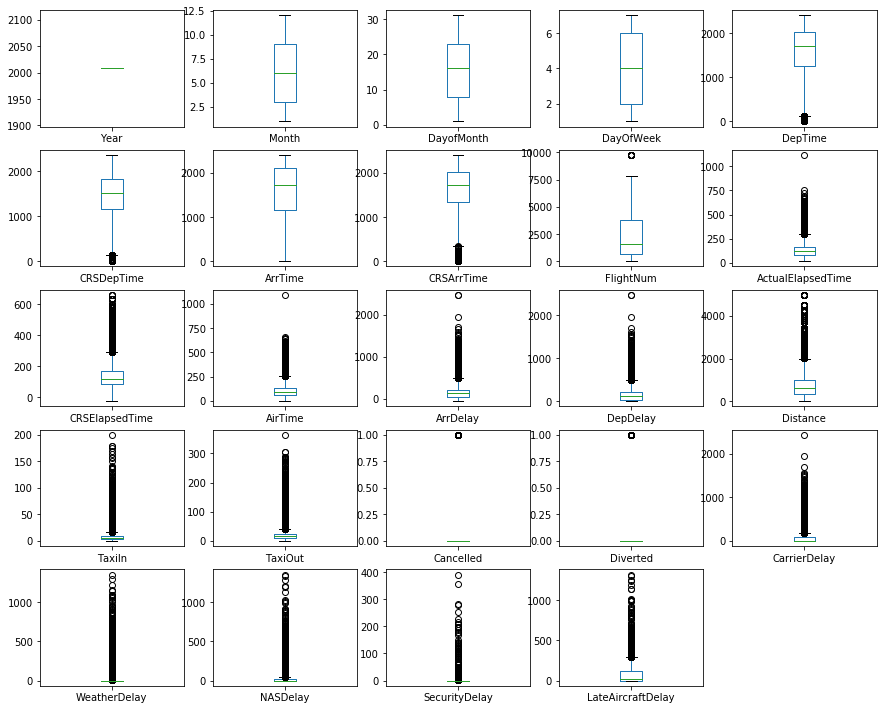

In [41]:
data.plot(kind='box',figsize=(15,15),layout=(6,5),subplots=True)
plt.show()

In [42]:
data.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [43]:
col = data.columns

In [44]:
for i in col:
    print(i + " : ",data[i].unique()) 
    print("\n")

Year :  [2008]


Month :  [ 6  7  3  2 12  8  1  5  4 11 10  9]


DayofMonth :  [ 8 20 21 16  5 12 27  6 23  2  3 26  1 13 30 28 11 22 19 15 24 29  7  4
 25 14 10  9 31 17 18]


DayOfWeek :  [7 2 4 1 3 6 5]


DepTime :  [1724. 2236. 1426. ...  542.  450.  454.]


CRSDepTime :  [1645 2145 1655 ...  310   13  231]


ArrTime :  [1857. 2348. 1911. ...  451.  559.   nan]


CRSArrTime :  [1802 2310 1840 ...  229  420  442]


UniqueCarrier :  ['XE' 'WN' 'OH' 'AA' 'DL' 'AS' '9E' 'FL' 'F9' 'YV' 'OO' 'NW' 'UA' 'CO'
 'EV' 'MQ' 'B6' 'US' 'HA' 'AQ']


FlightNum :  [3086 2004 5560 ... 6582 6844 7824]


TailNum :  ['N16911' 'N490WN' 'N408CA' ... 'N678MQ' '9149E' 'N389AA']


ActualElapsedTime :  [  93.   72.  107.   57.   95.  151.  105.  171.  189.  159.  221.  208.
  116.  114.   98.  165.   59.  269.   65.  173.  130.  156.   97.   83.
  229.  135.  104.  146.   90.  179.  103.   62.  115.  119.   99.   51.
  374.   89.   92.   38.  134.  124.  141.  293.  148.  112.   70.  223.
   79.   76.  110. 

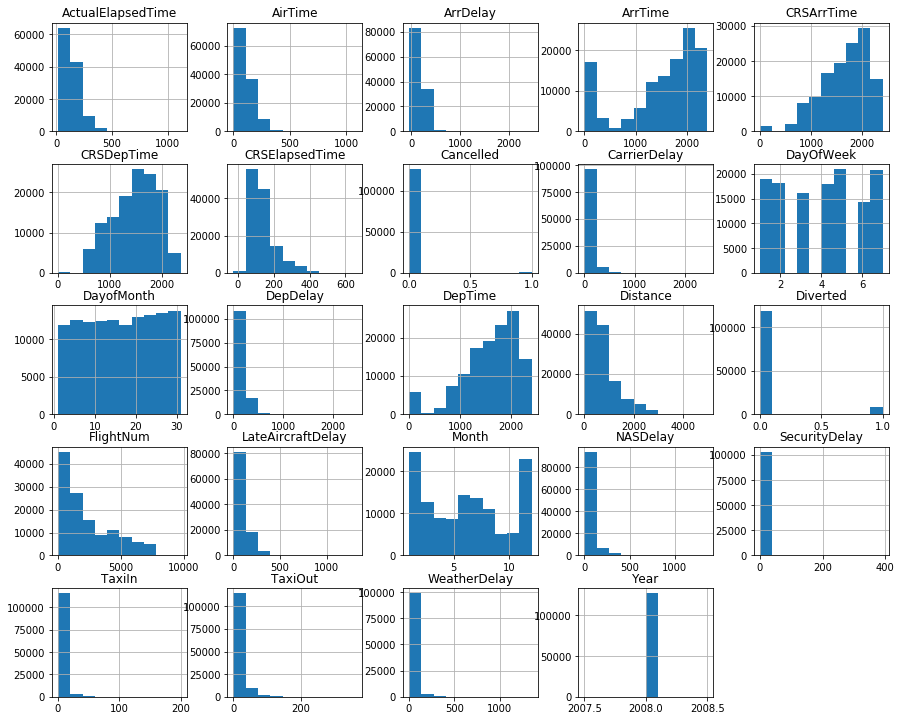

In [45]:
data.hist(figsize=(15,15),layout=(6,5))
plt.show()

In [46]:
# has only one value in the table ie "2008"
del data['Year']

In [47]:
data = data.drop(['ArrTime','CRSArrTime','AirTime', 'ArrDelay','TaxiIn','ActualElapsedTime', 'CRSElapsedTime', 'CancellationCode', 'Diverted'],axis = 1)
data.shape

(127276, 19)

In [48]:
data.isnull().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  3
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiOut                455
Cancelled                0
CarrierDelay         24156
WeatherDelay         24156
NASDelay             24156
SecurityDelay        24156
LateAircraftDelay    24156
dtype: int64

In [49]:
data[data.columns[1:]].corr()['TaxiOut'][:-1]*100

DayofMonth         0.022423
DayOfWeek         -0.499945
DepTime            5.954995
CRSDepTime         0.461583
FlightNum          0.651370
DepDelay           5.383571
Distance           4.741295
TaxiOut          100.000000
Cancelled          0.871910
CarrierDelay      -4.365337
WeatherDelay      10.816151
NASDelay          27.613530
SecurityDelay     -0.205018
Name: TaxiOut, dtype: float64

In [50]:
for i in col:
    try:
        print(i + " : ",data[i].unique()) 
        print("\n")
    except:
        print(" ")

 
Month :  [ 6  7  3  2 12  8  1  5  4 11 10  9]


DayofMonth :  [ 8 20 21 16  5 12 27  6 23  2  3 26  1 13 30 28 11 22 19 15 24 29  7  4
 25 14 10  9 31 17 18]


DayOfWeek :  [7 2 4 1 3 6 5]


DepTime :  [1724. 2236. 1426. ...  542.  450.  454.]


CRSDepTime :  [1645 2145 1655 ...  310   13  231]


 
 
UniqueCarrier :  ['XE' 'WN' 'OH' 'AA' 'DL' 'AS' '9E' 'FL' 'F9' 'YV' 'OO' 'NW' 'UA' 'CO'
 'EV' 'MQ' 'B6' 'US' 'HA' 'AQ']


FlightNum :  [3086 2004 5560 ... 6582 6844 7824]


TailNum :  ['N16911' 'N490WN' 'N408CA' ... 'N678MQ' '9149E' 'N389AA']


 
 
 
 
DepDelay :  [ 39.  51.  29. ... 976. 920. 597.]


Origin :  ['EWR' 'MHT' 'ORF' 'PHX' 'DTW' 'DFW' 'BOS' 'ORD' 'RIC' 'ATL' 'IAD' 'ANC'
 'MEM' 'CLT' 'JFK' 'BWI' 'LAX' 'DSM' 'OMA' 'DEN' 'JAX' 'TYS' 'MKE' 'MSN'
 'IAH' 'FAT' 'PFN' 'DCA' 'FSD' 'RNO' 'ABQ' 'TPA' 'MSP' 'HOU' 'MLI' 'MDW'
 'SEA' 'LAS' 'PIT' 'PDX' 'SLC' 'JNU' 'PHL' 'AMA' 'MIA' 'PBI' 'CVG' 'SYR'
 'ONT' 'XNA' 'CLE' 'FLG' 'SJC' 'SFO' 'PVD' 'FLL' 'SAN' 'GEG' 'LGB' 'DAL'
 'LGA' 'OAK' 'GCC

# Remove NaN Values

#TaxiOut -> WeatherDelay,NASDelay
#CarrierDelay -> CRSDepTime, NASDelay
#WeatherDelay -> TaxiOut, CarrierDelay
#SecurityDelay
#NASDelay -> TaxiOut, CarrierDelay
#LateAircraftDelay -> CarrierDelay, NASDelay, CRSDepTime

In [51]:
data[data.columns[1:]].corr()['CarrierDelay'][:-1]*100

DayofMonth        -0.954957
DayOfWeek          0.774590
DepTime           -9.836775
CRSDepTime       -22.894949
FlightNum          2.861339
DepDelay          57.939059
Distance           6.724498
TaxiOut           -4.365337
Cancelled               NaN
CarrierDelay     100.000000
WeatherDelay     -11.416049
NASDelay         -17.834043
SecurityDelay     -1.170197
Name: CarrierDelay, dtype: float64

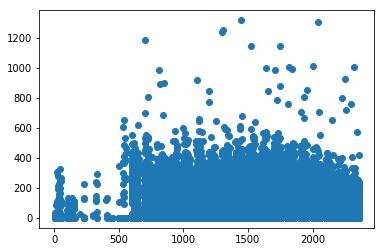

In [52]:
plt.scatter(data['CRSDepTime'],data['LateAircraftDelay'])
plt.show()

In [53]:
data["SecurityDelay"] = data["SecurityDelay"].fillna(data["SecurityDelay"].mean())
data["NASDelay"] = data["NASDelay"].fillna(data["NASDelay"].mean())
data['LateAircraftDelay'] = data['LateAircraftDelay'].fillna(data['LateAircraftDelay'].mean())

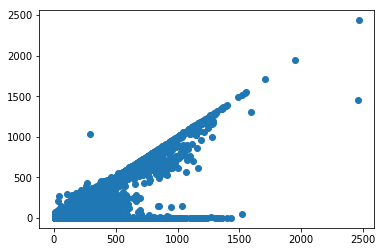

In [54]:
plt.scatter(data['DepDelay'],data['CarrierDelay'])
plt.show()

In [55]:
data.isnull().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  3
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiOut                455
Cancelled                0
CarrierDelay         24156
WeatherDelay         24156
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
dtype: int64

In [100]:
data1 = data[data['Cancelled']==0]
data1.isnull().sum()

Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  3
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiOut                  0
Cancelled                0
CarrierDelay         23523
WeatherDelay         23523
NASDelay                 0
SecurityDelay            0
LateAircraftDelay        0
dtype: int64

In [101]:
Carrmean = dict(data1.groupby('UniqueCarrier')['CarrierDelay'].mean())
data1['Carrmean'] = data1['UniqueCarrier'].apply(lambda x:Carrmean[x])
data1['CarrierDelay'].fillna(data1['Carrmean'],inplace=True)
del data1['Carrmean']

Weamean = dict(data1.groupby('Month')['WeatherDelay'].mean())
data1['Weamean'] = data1['Month'].apply(lambda x:Weamean[x])
data1['WeatherDelay'].fillna(data1['Weamean'],inplace=True)
del data1['Weamean']

ind = data1[data1['TailNum'].isnull() == True].index
data1 = data1.drop(index = ind)
data1.isnull().sum()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Amit Desai\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiOut              0
Cancelled            0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [102]:
# # CarrierDelay -> ArrDelay, DepDelay
# colname = "CarrierDelay"
# fillDf = data[["ArrDelay","DepDelay","CarrierDelay"]]
# predNaVal =fillDf[fillDf[colname].isnull()][["ArrDelay","DepDelay"]]
# new_data = fillDf.dropna(axis = 0, how ='any')[["ArrDelay","DepDelay" ,"CarrierDelay"]]
# print(new_data.shape, fillDf.shape ,predNaVal.shape)

# data_y = new_data[colname]
# data_x = new_data.drop([colname],axis= 1)

# X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=20)

# # regr = linear_model.LinearRegression()
# regr = linear_model.Ridge()

# regr.fit(X_train, y_train)
# y_pred = regr.predict(X_test)

# print('Coefficients: \n', regr.coef_)
# print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Y_pred = regr.predict(pd.DataFrame(predNaVal))
# mylist = predNaVal
# count = 0
# for i in range(predNaVal.shape[0]):
#     cond = ((data['ArrDelay'] == mylist.iloc[i]['ArrDelay']) & (data['DepDelay'] == mylist.iloc[i]['DepDelay']) & (data['CarrierDelay'].isnull()))
#     data.loc[cond, 'CarrierDelay'] = data.loc[cond, 'CarrierDelay'].fillna(Y_pred[count])
#     count = count +1

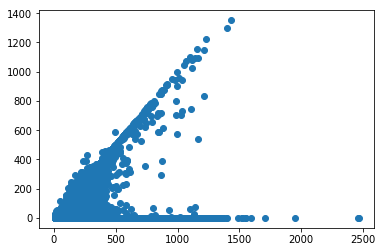

In [103]:
plt.scatter(data['DepDelay'],data['WeatherDelay'])
plt.show()

In [104]:
# # WeatherDelay -> ArrDelay, DepDelay
# colname = "WeatherDelay"
# fillDf = data[["ArrDelay","DepDelay","WeatherDelay"]]
# predNaVal =fillDf[fillDf[colname].isnull()][["ArrDelay","DepDelay"]]
# new_data = fillDf.dropna(axis = 0, how ='any')[["ArrDelay","DepDelay" ,"WeatherDelay"]]
# print(new_data.shape, fillDf.shape ,predNaVal.shape)

# data_y = new_data[colname]
# data_x = new_data.drop([colname],axis= 1)

# X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=20)

# # regr = linear_model.LinearRegression()
# regr = linear_model.Ridge()

# regr.fit(X_train, y_train)
# y_pred = regr.predict(X_test)

# print('Coefficients: \n', regr.coef_)
# print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Y_pred = regr.predict(pd.DataFrame(predNaVal))
# mylist = predNaVal
# count = 0
# for i in range(predNaVal.shape[0]):
#     cond = ((data['ArrDelay'] == mylist.iloc[i]['ArrDelay']) & (data['DepDelay'] == mylist.iloc[i]['DepDelay']) & (data['WeatherDelay'].isnull()))
#     data.loc[cond, 'WeatherDelay'] = data.loc[cond, 'WeatherDelay'].fillna(Y_pred[count])
#     count = count +1

In [63]:
# # TaxiOut -> CRSElapsedTime,ArrDelay
# colname = "TaxiOut"
# fillDf = data[["ArrDelay","CRSElapsedTime","TaxiOut"]]
# predNaVal =fillDf[fillDf[colname].isnull()][["ArrDelay","CRSElapsedTime"]]
# new_data = fillDf.dropna(axis = 0, how ='any')[["ArrDelay","CRSElapsedTime" ,"TaxiOut"]]
# print(new_data.shape, fillDf.shape ,predNaVal.shape)

# data_y = new_data[colname]
# data_x = new_data.drop([colname],axis= 1)

# X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=20)

# # regr = linear_model.LinearRegression()
# regr = linear_model.Ridge()

# regr.fit(X_train, y_train)
# y_pred = regr.predict(X_test)

# print('Coefficients: \n', regr.coef_)
# print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Y_pred = regr.predict(pd.DataFrame(predNaVal))
# mylist = predNaVal
# count = 0
# for i in range(predNaVal.shape[0]):
#     cond = ((data['ArrDelay'] == mylist.iloc[i]['ArrDelay']) & (data['CRSElapsedTime'] == mylist.iloc[i]['CRSElapsedTime']) & (data['TaxiOut'].isnull()))
#     data.loc[cond, 'TaxiOut'] = data.loc[cond, 'TaxiOut'].fillna(Y_pred[count])
#     count = count +1

In [64]:
# # LateAircraftDelay -> CRSDepTime, ArrDelay, DepDelay
# colname = "LateAircraftDelay"
# fillDf = data[["CRSDepTime","ArrDelay","DepDelay" , "LateAircraftDelay"]]
# new_data = fillDf.dropna(axis = 0, how ='any')[["CRSDepTime","ArrDelay","DepDelay","LateAircraftDelay"]]
# predNaVal =fillDf[(fillDf[colname].isnull())][["CRSDepTime","ArrDelay","DepDelay"]]
# print(new_data.shape, fillDf.shape ,predNaVal.shape)

# data_y = new_data[colname]
# data_x = new_data.drop([colname],axis= 1)

# X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=20)

# # regr = linear_model.LinearRegression()
# regr = linear_model.Ridge()

# regr.fit(X_train, y_train)
# y_pred = regr.predict(X_test)

# print('Coefficients: \n', regr.coef_)
# print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Y_pred = regr.predict(pd.DataFrame(predNaVal))
# mylist = predNaVal
# count = 0
# for i in range(predNaVal.shape[0]):
#     cond = ((data['CRSDepTime'] == mylist.iloc[i]['CRSDepTime']) 
#             & (data['ArrDelay'] == mylist.iloc[i]['ArrDelay'])
#             & (data['DepDelay'] == mylist.iloc[i]['DepDelay'])
#             & (data['LateAircraftDelay'].isnull()))
#     data.loc[cond, 'LateAircraftDelay'] = data.loc[cond, 'LateAircraftDelay'].fillna(Y_pred[count])
#     count = count +1

In [106]:
data1.isnull().sum()

Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiOut              0
Cancelled            0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [107]:
data1.shape

(126640, 19)

In [108]:
# outlier

In [109]:
data1['Month'] = data1['Month'].astype('object')
data1['DayofMonth'] = data1['DayofMonth'].astype('object')
data1['DayOfWeek'] = data1['DayOfWeek'].astype('object')
data1['FlightNum'] = data1['FlightNum'].astype('object')
data1['SecurityDelay'] = data1['SecurityDelay'].astype('object')

In [124]:
num = data1.select_dtypes(include=['float64'])
cat = data1.select_dtypes(include=['object'])

In [125]:
cat.isnull().sum()

Month            0
DayofMonth       0
DayOfWeek        0
UniqueCarrier    0
FlightNum        0
TailNum          0
Origin           0
Dest             0
SecurityDelay    0
dtype: int64

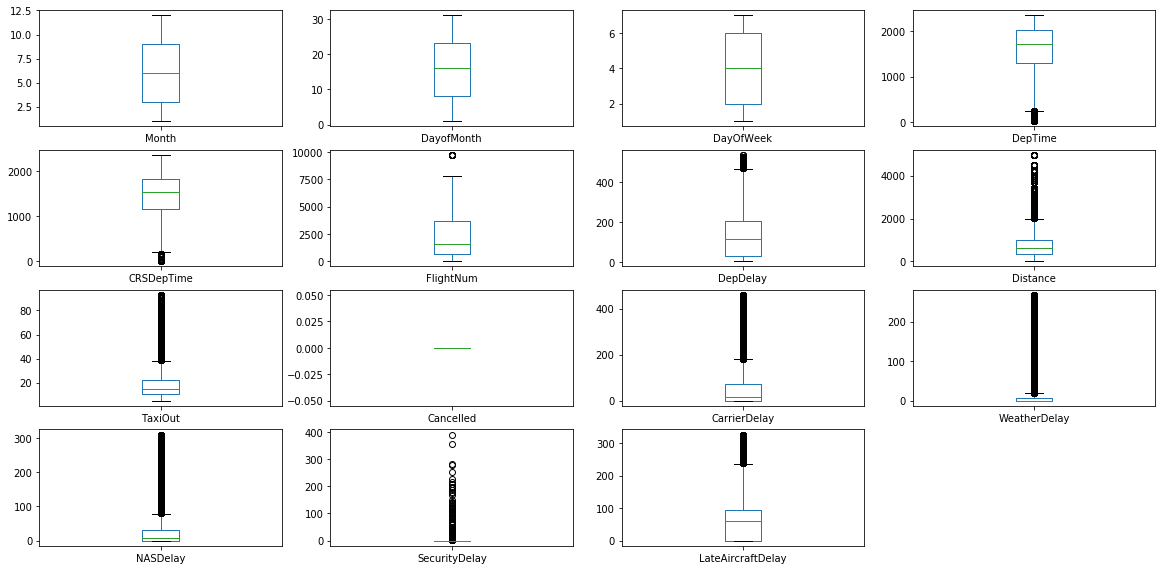

In [126]:
data1.plot(kind='box',subplots=True,figsize=(20,15),layout=(6,4))
plt.show()

In [112]:
#num = num.drop('ArrDelay',axis=1)

In [127]:
q3 = num.quantile(0.99)
q1 = num.quantile(0.01)
iqr= q3-q1
high = q3+0*iqr
low = q1-0*iqr

In [128]:
indexes= data1.index[((num>high)|(num<low)).any(1)].to_list()
len(indexes)

8988

In [129]:
data1 = data1.drop(index=indexes)
data1 = data1.reset_index(drop=True)
data1.shape

(108761, 19)

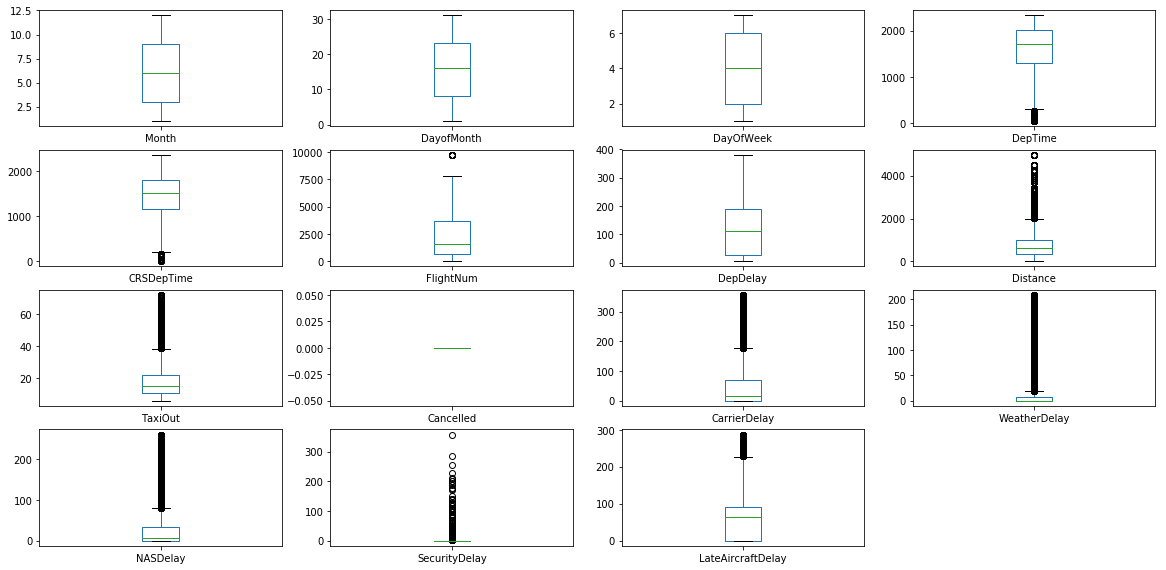

In [130]:
data1.plot(kind='box',subplots=True,figsize=(20,15),layout=(6,4))
plt.show()

In [131]:
num = data1.select_dtypes(include=['float64'])
cat = data1.select_dtypes(include=['object'])

In [132]:
y = num['DepDelay']
num = num.drop('DepDelay',axis=1)

In [133]:
scale = MinMaxScaler()
num = pd.DataFrame(scale.fit_transform(num),columns=num.columns)
num.shape

(108761, 6)

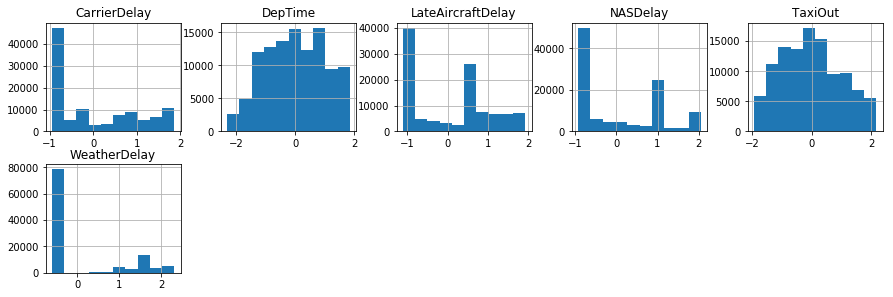

In [134]:
from sklearn.preprocessing import power_transform
num = pd.DataFrame(power_transform(num,method='yeo-johnson'),columns=num.columns)
num.hist(figsize=(15,15),layout=(6,5))
plt.show()

In [135]:
cat.isnull().sum()

Month            0
DayofMonth       0
DayOfWeek        0
UniqueCarrier    0
FlightNum        0
TailNum          0
Origin           0
Dest             0
SecurityDelay    0
dtype: int64

In [136]:
le_UniqueCarrier = LabelEncoder()
le_Origin = LabelEncoder()
le_Dest = LabelEncoder()
le_TailNum = LabelEncoder()

cat['UniqueCarrier'] = le_UniqueCarrier.fit_transform(cat.UniqueCarrier)
cat['Origin'] = le_Origin.fit_transform(cat.Origin)
cat['Dest'] = le_Dest.fit_transform(cat.Dest)
cat['TailNum'] = le_TailNum.fit_transform(cat.TailNum)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [137]:
cat = cat.reset_index(drop=True)
num = num.reset_index(drop=True)
df_final = pd.concat([num,cat],axis=1)
df_final.isnull().sum()

DepTime              0
TaxiOut              0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
LateAircraftDelay    0
Month                0
DayofMonth           0
DayOfWeek            0
UniqueCarrier        0
FlightNum            0
TailNum              0
Origin               0
Dest                 0
SecurityDelay        0
dtype: int64

In [140]:
data_y = y
data_x = df_final
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=20)

# regr = linear_model.LinearRegression()
regr = linear_model.Ridge()

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.31529427e+01  6.84015811e+00  2.26175012e+01 -3.55293615e+01
 -2.71567774e+00  2.46712818e+01  3.99173563e-01  1.06269937e-01
  3.63368645e-01 -2.08940423e-01  2.18781647e-03 -4.05775138e-04
  2.42809085e-02 -2.77337611e-02  3.60853475e-01]
Mean squared error: 5832.08
Variance score: 0.26


In [141]:
import statsmodels.api as sm 

D:\anaconda\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [144]:
regressor_OLS = sm.OLS(endog = y, exog = df_final.astype(float)).fit() 
regressor_OLS.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               DepDelay   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 1.758e+04
Date:                Sat, 28 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:19:11   Log-Likelihood:            -6.2997e+05
No. Observations:              108761   AIC:                         1.260e+06
Df Residuals:                  108746   BIC:                         1.260e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
DepTime              13.2861      0.249     53.401      0.000      12.798      13.774
TaxiOut               8.6721      0.251     34.521      0.000       8.180       9.164
CarrierDelay         23.1610      0.270     85.847      0.000      22.632      23.690
WeatherDelay        -35.5144      0.267   -132.830      0.000     -36.038     -34.990
NASDelay             -2.6724      0.270     -9.914      0.000      -3.201      -2.144
LateAircraftDelay    24.4602      0.275     89.033      0.000      23.922      24.999
Month                 2.4762      0.065     38.390      0.000       2.350       2.603
DayofMonth            0.9430      0.026     36.552      0.000       0.892       0.994
DayOfWeek             4.7574      0.109     43.505      0.000       4.543       4.972
UniqueCarrier         0.8363      0.040     20.788      0.000       0.757       0.915
FlightNum             0.0039      0.000     32.585      0.000       0.004       0.004
TailNum               0.0048      0.000     32.171      0.000       0.005       0.005
Origin                0.1376      0.003     48.039      0.000       0.132       0.143
Dest                  0.0872      0.003     30.557      0.000       0.082       0.093
SecurityDelay         0.3372      0.078      4.342      0.000       0.185       0.489
==============================================================================
Omnibus:                     7715.917   Durbin-Watson:                   0.778
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9501.160
Skew:                           0.724   Prob(JB):                         0.00
Kurtosis:                       2.976   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:


# regr = linear_model.LinearRegression()
regr = linear_model.Ridge()

regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.31529427e+01  6.84015811e+00  2.26175012e+01 -3.55293615e+01
 -2.71567774e+00  2.46712818e+01  3.99173563e-01  1.06269937e-01
  3.63368645e-01 -2.08940423e-01  2.18781647e-03 -4.05775138e-04
  2.42809085e-02 -2.77337611e-02  3.60853475e-01]
Mean squared error: 5832.08
Variance score: 0.26


In [147]:
data_y = y
data_x = df_final

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=20)

regr = linear_model.ElasticNet()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 9.57369218e+00  4.20565186e+00  1.01736786e+01 -2.10232118e+01
 -6.18105147e+00  1.15977139e+01  3.46007959e-01  1.00819598e-01
  3.73984454e-01 -3.74672990e-01  1.75625194e-03 -5.43848828e-04
  2.59222235e-02 -2.59502568e-02  1.47460614e-01]
Mean squared error: 6131.66
Variance score: 0.22


In [148]:
data_y = y
data_x = df_final

# Create linear regression object
regr = linear_model.Lasso()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 1.23840841e+01  5.58293359e+00  2.08993529e+01 -3.45273639e+01
 -2.17892556e+00  2.28799648e+01  3.07485971e-01  9.55374536e-02
  1.68473308e-01 -2.20543300e-01  2.09995176e-03 -4.11116140e-04
  2.23068078e-02 -2.77340289e-02  2.25413650e-01]
Mean squared error: 5841.38
Variance score: 0.25


In [156]:
data1.corr()

,DepTime,CRSDepTime,DepDelay,Distance,TaxiOut,Cancelled,CarrierDelay,WeatherDelay,NASDelay,LateAircraftDelay
DepTime,1.000000,0.680774,0.162141,-0.058780,0.052795,NaN,-0.106710,-0.007424,0.033286,0.138757
CRSDepTime,0.680774,1.000000,0.004586,-0.037275,0.001201,NaN,-0.221207,-0.004033,-0.037343,0.187519
DepDelay,0.162141,0.004586,1.000000,0.026521,0.059898,NaN,0.368892,-0.004006,0.086359,0.322360
Distance,-0.058780,-0.037275,0.026521,1.000000,0.059296,NaN,0.061439,-0.028501,-0.027219,0.025799
TaxiOut,0.052795,0.001201,0.059898,0.059296,1.000000,NaN,-0.007753,0.057849,0.170002,-0.047558
Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CarrierDelay,-0.106710,-0.221207,0.368892,0.061439,-0.007753,NaN,1.000000,-0.120677,-0.210494,-0.367497
WeatherDelay,-0.007424,-0.004033,-0.004006,-0.028501,0.057849,NaN,-0.120677,1.000000,-0.050466,-0.087112
NASDelay,0.033286,-0.037343,0.086359,-0.027219,0.170002,NaN,-0.210494,-0.050466,1.000000,-0.221103
LateAircraftDelay,0.138757,0.187519,0.322360,0.025799,-0.047558,NaN,-0.367497,-0.087112,-0.221103,1.000000


In [157]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
principalComponents = pca.fit_transform(df_final[['DepTime','CarrierDelay','LateAircraftDelay']])
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])

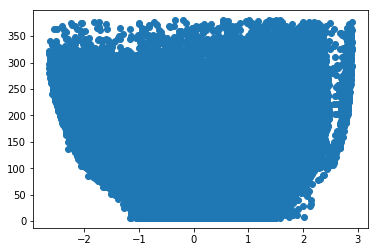

In [158]:
plt.scatter(principalDf,y)

In [154]:
principalDf.shape

(108761, 1)

In [155]:
y.shape

(108761,)